# Customer Segmentation

Customer Segmentation - Group Project
Customer Segmentation
Problem Statement:  XYZ bank wants to roll out Christmas offers to their customers. But Bank does not want to roll out same offer to all customers  instead they want to roll out personalized offer to particular set of customers. If they manually start understanding the category of customer then this will be not efficient and also they will not be able to uncover the hidden pattern in the data ( pattern which group certain kind of customer in one category). Bank approached ABC analytics company to solve their problem. Bank also shared information with ABC analytics that they don't want more than 5 group as this will be inefficient for their campaign.

ML Problem: ABC analytics proposed customer segmentation approach to Bank.

ABC analytics assigned this talk to their analytics team and instructed their team to come up with the approach and feature which group similar behavior customer in one category and others in different category.

Note: Please read problem statement carefully and propose the approach which should be as per the customer requirement.

Task:

1. Business Understanding

2. Data Understanding

3. EDA

4. Feature Engineering

4. Model Building

5. Model Evaluation

6. Presentation (Recommendation slide is must)

7. Document the challenges

|**Column Name**|Description|
| --- | ---|
|**fecha_dato**|The table is partitioned for this column|
|**ncodpers**|	Customer code|
|**ind_empleado**|Employee index: A active, B ex employed, F filial, N not employee, P pasive|
|**pais_residencia**|Customer's Country residence|
|**sexo**|Customer's sex|
|**age**|Age|
|**fecha_alta**|The date in which the customer became as the first holder of a contract in the bank|
|**ind_nuevo**|New customer Index. 1 if the customer registered in the last 6 months|
|**antiguedad**|Customer seniority (in months)|
|**indrel**|1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)|
|**ult_fec_cli_1t**|Last date as primary customer (if he isn't at the end of the month)|
|**indrel_1mes**|Customer type at the beginning of the month: 1 (First/Primary customer), 2 (co-owner), P (Potential), 3 (former primary), 4(former co-owner)|
|**tiprel_1mes**|Customer relation type at the beginning of the month: A (active), I (inactive), P (former customer), R (Potential)|
|**indresi**|Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)|
|**indext**|Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)|
|**conyuemp**|Spouse index. 1 if the customer is spouse of an employee|
|**canal_entrada**|channel used by the customer to join|
|**indfall**|Deceased index. N/S|
|**tipodom**|Addres type. 1, primary address|
|**cod_prov**|Province code (customer's address)|
|**nomprov**|Province name|
|**ind_actividad_cliente**|Activity index (1, active customer; 0, inactive customer)|
|**renta**|Gross income of the household|
|**ind_ahor_fin_ult1**|Saving Account|
|**ind_aval_fin_ult1**|Guarantees|
|**ind_cco_fin_ult1**|Current Accounts|
|**ind_cder_fin_ult1**|Derivada Account|
|**ind_cno_fin_ult1**|Payroll Account|
|**ind_ctju_fin_ult1**|Junior Account|
|**ind_ctma_fin_ult1**|Más particular Account|
|**ind_ctop_fin_ult1**|particular Account|
|**ind_ctpp_fin_ult1**|particular Plus Account|
|**ind_deco_fin_ult1**|Short-term deposits|
|**ind_deme_fin_ult1**|Medium-term deposits|
|**ind_dela_fin_ult1**|Long-term deposits|
|**ind_ecue_fin_ult1**|e-account|
|**ind_fond_fin_ult1**|Funds|
|**ind_hip_fin_ult1**|Mortgage|
|**ind_plan_fin_ult1**|Pensions|
|**ind_pres_fin_ult1**|Loans|
|**ind_reca_fin_ult1**|Taxes|
|**ind_tjcr_fin_ult1**|Credit Card|
|**ind_valo_fin_ult1**|Securities|
|**ind_viv_fin_ult1**|Home Account|
|**ind_nomina_ult1**|Payroll|
|**ind_nom_pens_ult1**|Pensions|
|**ind_recibo_ult1**|Direct Debit|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.io as pio
template = 'simple_white'

import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

seed = 42

# Joseph

In [2]:
df = pd.read_csv("C:/Users/joean/Desktop/Data Science/Personal Projects/cust_seg.csv")
df

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2015-02-28,1183296,N,ES,H,27,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,1
999996,999996,2015-02-28,1183295,N,ES,H,56,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,0
999997,999997,2015-02-28,1183294,N,ES,V,39,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,1
999998,999998,2015-02-28,1183293,N,ES,V,36,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1000000 non-null  int64  
 1   fecha_dato             1000000 non-null  object 
 2   ncodpers               1000000 non-null  int64  
 3   ind_empleado           989218 non-null   object 
 4   pais_residencia        989218 non-null   object 
 5   sexo                   989214 non-null   object 
 6   age                    1000000 non-null  object 
 7   fecha_alta             989218 non-null   object 
 8   ind_nuevo              989218 non-null   float64
 9   antiguedad             1000000 non-null  object 
 10  indrel                 989218 non-null   float64
 11  ult_fec_cli_1t         1101 non-null     object 
 12  indrel_1mes            989218 non-null   float64
 13  tiprel_1mes            989218 non-null   object 
 14  indresi            

In [4]:
df.columns

Index(['Unnamed: 0', 'fecha_dato', 'ncodpers', 'ind_empleado',
       'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo',
       'antiguedad', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes',
       'indresi', 'indext', 'conyuemp', 'canal_entrada', 'indfall', 'tipodom',
       'cod_prov', 'nomprov', 'ind_actividad_cliente', 'renta',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

Dropping first two columns as they do not give much information.

In [5]:
df = df.iloc[:,2:]
df.head()

,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
2,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
3,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
4,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0


#### Checking for duplicate observations

`ncoderpers` contains customer codes. Lets check if there are duplicate customer codes

In [6]:
df['ncodpers'].value_counts()

281941     2
362212     2
362218     2
362219     2
362220     2
          ..
1310578    1
1310579    1
1310645    1
1310643    1
1183305    1
Name: ncodpers, Length: 626159, dtype: int64

There are duplicate customer codes. Since the bank wants to segment unique customers, I will drop observations with duplicate customer codes and keep only the last observation for each duplicated customer code observation.

In [7]:
df = df.drop_duplicates(subset = ['ncodpers'], keep = "last").reset_index(drop = True)
print(df.shape)

(626159, 46)


In [8]:
1000000 - 626159

373841

Approximately 370K+ duplicated observation has been removed.

In [9]:
df['ncodpers'].value_counts().sum()

626159

Now, all customer codes are unique. I will drop this variable has customer code does not give any information for customer segmentation.

In [10]:
df = df.drop('ncodpers', axis = 1)
df.head()

,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [11]:
df.duplicated().sum()

15267

After dropping customer codes, we can see there are about 15k duplicate rows still. I have decided to drop these duplicates too.

In [12]:
df = df.drop_duplicates().reset_index(drop = True)

In [13]:
df

,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610887,N,ES,H,27,2013-09-25,0.0,22,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1
610888,N,ES,H,56,2013-09-25,0.0,22,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
610889,N,ES,V,39,2013-09-25,0.0,22,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1
610890,N,ES,V,36,2013-09-25,0.0,22,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1


#### Checking for missing values

In [14]:
#checking percentage of missing values for every variable.
df.isna().sum()/len(df)*100

ind_empleado              0.029301
pais_residencia           0.029301
sexo                      0.029629
age                       0.000000
fecha_alta                0.029301
ind_nuevo                 0.029301
antiguedad                0.000000
indrel                    0.029301
ult_fec_cli_1t           99.873464
indrel_1mes               0.029301
tiprel_1mes               0.029301
indresi                   0.029301
indext                    0.029301
conyuemp                 99.985431
canal_entrada             0.037650
indfall                   0.029301
tipodom                   0.029301
cod_prov                  0.630390
nomprov                   0.630390
ind_actividad_cliente     0.029301
renta                    15.842899
ind_ahor_fin_ult1         0.000000
ind_aval_fin_ult1         0.000000
ind_cco_fin_ult1          0.000000
ind_cder_fin_ult1         0.000000
ind_cno_fin_ult1          0.000000
ind_ctju_fin_ult1         0.000000
ind_ctma_fin_ult1         0.000000
ind_ctop_fin_ult1   

Deleting variables having percentage of missing values higher than 20%

In [15]:
missing_info = (df.isna().sum()/len(df)*100)

to_drop = missing_info[missing_info.values > 20].index #setting threshold

print(f"columns to drop: {to_drop}")
print()

df = df.drop(to_drop, axis = 1).reset_index(drop = True)
print(df.shape)

columns to drop: Index(['ult_fec_cli_1t', 'conyuemp'], dtype='object')

(610892, 43)


Checking unique values for each variable

In [16]:
for col in df.columns:
    print(col, ":", df[col].unique())
    print()

ind_empleado : ['N' nan 'A' 'B' 'F' 'S']

pais_residencia : ['ES' nan 'CA' 'CH' 'CL' 'IE' 'AT' 'NL' 'FR' 'GB' 'DE' 'DO' 'BE' 'AR' 'VE'
 'US' 'MX' 'BR' 'IT' 'EC' 'PE' 'CO' 'HN' 'FI' 'SE' 'AL' 'PT' 'MZ' 'CN'
 'TW' 'PL' 'IN' 'CR' 'NI' 'HK' 'AE' 'MA' 'GR' 'PR' 'RO' 'IL' 'RU' 'GT'
 'GA' 'NO' 'SN' 'MR' 'UA' 'BG' 'PY' 'EE' 'SV' 'CZ' 'ET' 'CM' 'SA' 'CI'
 'QA' 'SG' 'BO' 'BZ' 'UY' 'MD' 'BA' 'CF' 'KR' 'LU' 'NG' 'CD' 'ZA' 'AU'
 'KZ' 'CU' 'DK' 'JP' 'SK' 'GM' 'AO' 'HR' 'PK' 'PA' 'MK' 'LY' 'LT' 'TH'
 'GQ' 'GN' 'TR' 'IS' 'KE' 'VN' 'RS' 'AD' 'NZ' 'OM' 'EG' 'LV' 'ML' 'CG'
 'GW' 'HU' 'DZ' 'SL' 'GI' 'KH' 'MM' 'BY' 'PH' 'KW' 'GH' 'TN' 'TG' 'LB'
 'GE']

sexo : ['H' 'V' nan]

age : [' 35' ' 23' ' 22' ' 24' ' 65' ' 28' ' 25' ' 26' ' 53' ' 27' ' 32' ' 37'
 ' 31' ' 39' ' 63' ' 33' ' 55' ' 42' ' 58' ' 38' ' 50' ' 30' ' 45' ' 44'
 ' 36' ' 29' ' 60' ' 57' ' 67' ' 47' ' NA' ' 34' ' 48' ' 46' ' 54' ' 84'
 ' 15' ' 12' '  8' '  6' ' 83' ' 40' ' 77' ' 69' ' 52' ' 59' ' 43' ' 10'
 '  9' ' 49' ' 41' ' 51' ' 78' ' 16' ' 1

Lets analyze each variable. First I will begin with `ind_empleado` and filter those observations with missing values.

#### `ind_empleado`: Employee index

In [17]:
df[df['ind_empleado'].isna()]

,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
260,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1810,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,1
1827,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1879,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,NaN,NaN,0
2093,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514105,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
527359,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
551707,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1.0,1.0,0
568366,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0.0,0.0,1


In [18]:
df[df['ind_empleado'].isna()].isna().sum()

ind_empleado             179
pais_residencia          179
sexo                     179
age                        0
fecha_alta               179
ind_nuevo                179
antiguedad                 0
indrel                   179
indrel_1mes              179
tiprel_1mes              179
indresi                  179
indext                   179
canal_entrada            179
indfall                  179
tipodom                  179
cod_prov                 179
nomprov                  179
ind_actividad_cliente    179
renta                    179
ind_ahor_fin_ult1          0
ind_aval_fin_ult1          0
ind_cco_fin_ult1           0
ind_cder_fin_ult1          0
ind_cno_fin_ult1           0
ind_ctju_fin_ult1          0
ind_ctma_fin_ult1          0
ind_ctop_fin_ult1          0
ind_ctpp_fin_ult1          0
ind_deco_fin_ult1          0
ind_deme_fin_ult1          0
ind_dela_fin_ult1          0
ind_ecue_fin_ult1          0
ind_fond_fin_ult1          0
ind_hip_fin_ult1           0
ind_plan_fin_u

There are about 6985 observation having missing values across multiple columns. It would be impossible to impute these observations with meaning full information as other columns belonging to same observation has missing values too. Therefore, I will drop these observations.

In [19]:
to_drop = df[df['ind_empleado'].isna()].index

df = df.drop(index = to_drop, axis = 0).reset_index(drop = True)
print(df.shape)

(610713, 43)


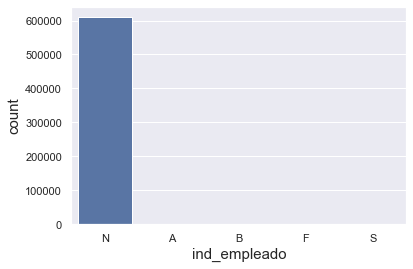

In [20]:
sns.countplot(df['ind_empleado']);

In [21]:
print(df['ind_empleado'].value_counts())
print()
print(df['ind_empleado'].value_counts(normalize = True)*100)

N    610233
B       194
A       144
F       141
S         1
Name: ind_empleado, dtype: int64

N    99.921403
B     0.031766
A     0.023579
F     0.023088
S     0.000164
Name: ind_empleado, dtype: float64


Employee index: 
* A: active, 
* B: ex employed, 
* F: filial, 
* N: not employee, 
* P: pasive

Almost all customers are active. Only a small negligible portion of customers belong to other categories. 

#### `pais_residencia`: Customer's Country residence

In [22]:
any(df['pais_residencia'].isna()) # No Missing values

False

In [23]:
print(df['pais_residencia'].value_counts())
print()
df['pais_residencia'].value_counts(normalize = True)*100

ES    607040
FR       286
AR       276
DE       256
GB       254
       ...  
CD         1
KZ         1
GM         1
IS         1
GE         1
Name: pais_residencia, Length: 113, dtype: int64



ES    99.398572
FR     0.046831
AR     0.045193
DE     0.041918
GB     0.041591
        ...    
CD     0.000164
KZ     0.000164
GM     0.000164
IS     0.000164
GE     0.000164
Name: pais_residencia, Length: 113, dtype: float64

99.4% of customers are from spain.

#### `sexo`: Customer's Gender

In [24]:
df['sexo'].isna().sum() 

2

Imputing `sexo` variable with the mode.

In [25]:
df['sexo'] = df['sexo'].fillna(df['sexo'].mode()[0])

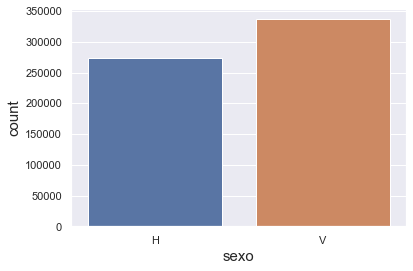

In [26]:
sns.countplot(df['sexo']);

'V' category is higher in proportion compared to 'H'

#### `age`: Age

In [27]:
df['age']

0          35
1          23
2          23
3          22
4          23
         ... 
610708     27
610709     56
610710     39
610711     36
610712     38
Name: age, Length: 610713, dtype: object

This variable is supposed to be numerical, but currently it is of object data type. In order to convert this variable to numerical, the 'NA' value must be dealt with first.

In [28]:
df.query('age == " NA"')

,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1


Luckily, when dealing with missing values in `ind_empleado`, the NA values in `age` has also been removed.

In [29]:
#Converting age to numerical
df['age'] = df['age'].str.strip().astype('int64')

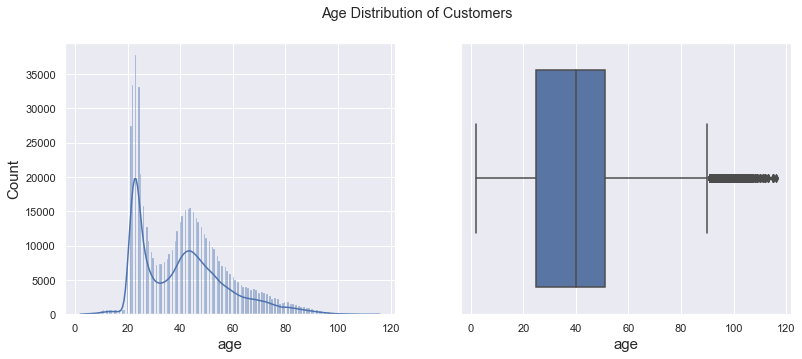

In [30]:
fig, ax = plt.subplots(1,2, figsize = (13,5));

sns.histplot(df['age'], kde = True, ax = ax[0]);
sns.boxplot(x = 'age', data = df, ax = ax[1]);

plt.suptitle("Age Distribution of Customers");

Age distribution is Bi-modal, where majority of customers are young, between the age of 20-30, followed by older customers, between the age of 40 and 50. There seems to outliers in both sides of the distribution.

In [31]:
df['age'].describe()

count    610713.000000
mean         40.734766
std          17.050297
min           2.000000
25%          25.000000
50%          40.000000
75%          51.000000
max         116.000000
Name: age, dtype: float64

There are customers as young as 2 years and customers as old as 116 years!

I will assign ages below 18 as 18. For ages older than 85, I will assign 85.

This method will take care of outliers on both sides of the distribution.

In [32]:
#Ages where below 18 will be assigned as 24, and ages above 85 will be assigned as 45.
df['age'] = np.where(df['age'] < 20, 18, (np.where(df['age'] > 85, 85, df['age'])))

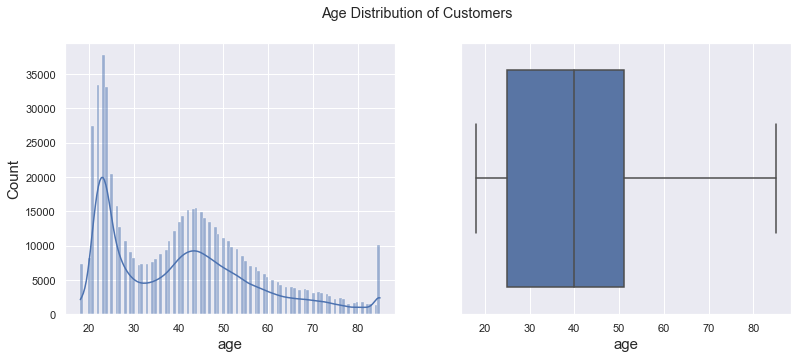

In [33]:
fig, ax = plt.subplots(1,2, figsize = (13,5));

sns.histplot(df['age'], kde = True, ax = ax[0]);
sns.boxplot(x = 'age', data = df, ax = ax[1]);

plt.suptitle("Age Distribution of Customers");

There are no more outliers in the age distribution.

#### `fecha_alta`: the date in which the customer became as the first holder of a contract in the bank

In [34]:
print(any(df['fecha_alta'].isna())) #No missing value
print()
df['fecha_alta']

False



0         2015-01-12
1         2012-08-10
2         2012-08-10
3         2012-08-10
4         2012-08-10
             ...    
610708    2013-09-25
610709    2013-09-25
610710    2013-09-25
610711    2013-09-25
610712    2013-09-25
Name: fecha_alta, Length: 610713, dtype: object

Converting to Datetime format

In [35]:
df['fecha_alta'] = pd.to_datetime(df['fecha_alta'])

In [36]:
df['fecha_alta_year'] = df.fecha_alta.dt.year #Extracting years
df['fecha_alta_month'] = df.fecha_alta.dt.month #extracting months
df['fecha_alta_date'] = df.fecha_alta.dt.day #extracting months
df['fecha_alta_day'] = df.fecha_alta.dt.weekday #extracting day of week

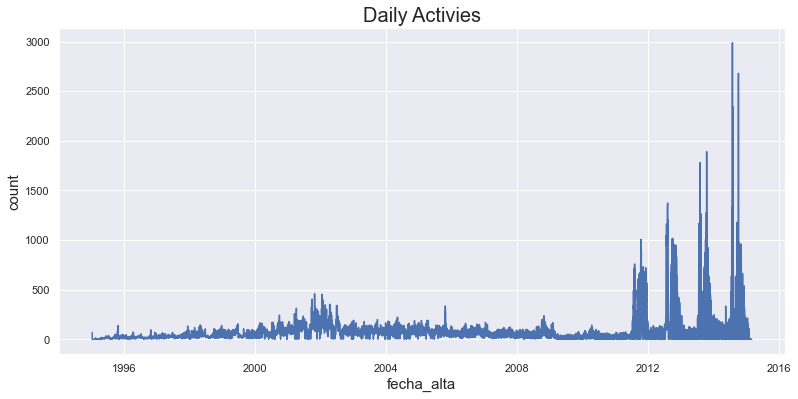

In [37]:
temp_df = df.groupby('fecha_alta').size().reset_index().rename(columns = {0:"count"})

plt.figure(figsize = (13,6));
ax = sns.lineplot(x = 'fecha_alta', y = 'count', data = temp_df);
ax.set_title("Daily Activies");

There is a significant spike in customers after 2010. There seems to be an upward trand and seasonality in number of customers.

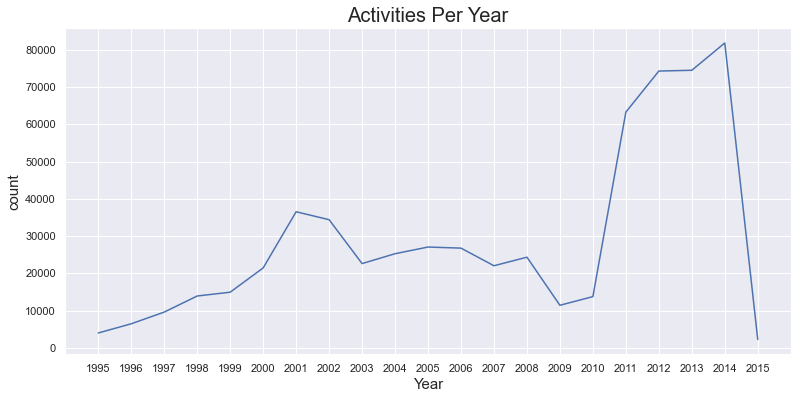

In [38]:
temp_df = df.groupby('fecha_alta_year').size().reset_index().rename(columns = {0:"count"})

plt.figure(figsize = (13,6));
ax = sns.lineplot(x = 'fecha_alta_year', y = 'count', data = temp_df);
ax.set_xticks(np.arange(1995, 2016, 1));
ax.set_title("Activities Per Year");
ax.set_xlabel("Year");

Years between 2011 and 2014 saw the highest number of applicants compared to other years

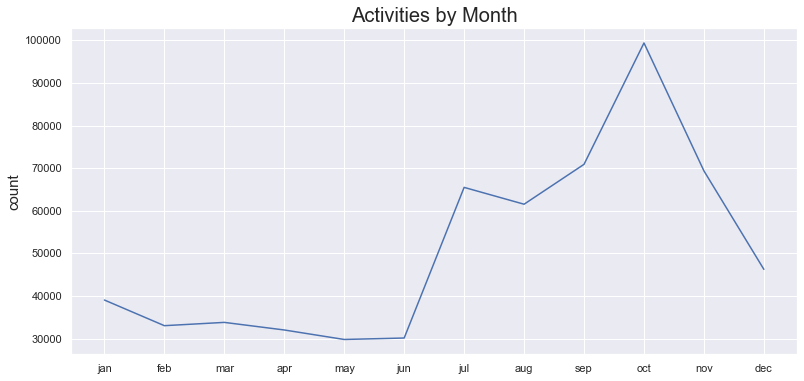

In [39]:
temp_df = df.groupby('fecha_alta_month').size().reset_index().rename(columns = {0:"count"})

plt.figure(figsize = (13,6));
ax = sns.lineplot(x = 'fecha_alta_month', y = 'count', data = temp_df);
plt.xticks(np.arange(1, 13, 1), ["jan", "feb", "mar", "apr", "may", "jun", "jul",
                                 "aug", "sep", "oct", "nov", "dec"]);
ax.set_title("Activities by Month");
ax.set_xlabel("");

For all years, most customers join during the month of october.

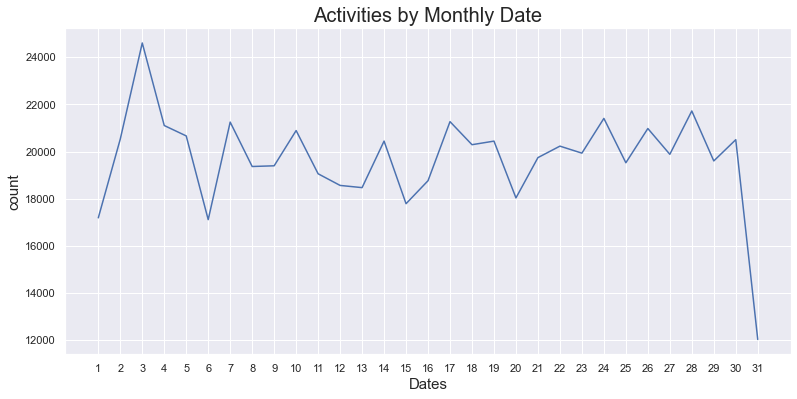

In [40]:
temp_df = df.groupby('fecha_alta_date').size().reset_index().rename(columns = {0:"count"})

plt.figure(figsize = (13,6));
ax = sns.lineplot(x = 'fecha_alta_date', y = 'count', data = temp_df);
ax.set_xticks(np.arange(1, 32, 1));
ax.set_title("Activities by Monthly Date");
ax.set_xlabel("Dates");

There seems almost no discernible pattern on the date of number of customers. End of the months shows the lowest number of customers. Customers are higher during the start of the month.

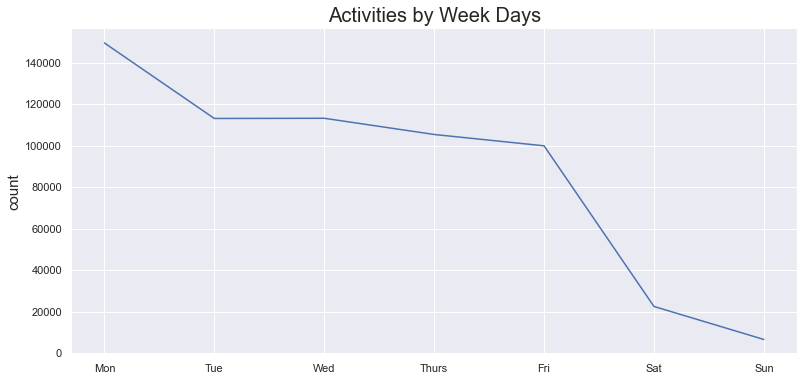

In [41]:
temp_df = df.groupby('fecha_alta_day').size().reset_index().rename(columns = {0:"count"})

plt.figure(figsize = (13,6));
ax = sns.lineplot(x = 'fecha_alta_day', y = 'count', data = temp_df);
plt.xticks(np.arange(0, 7, 1), ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']);
ax.set_title("Activities by Week Days");
ax.set_xlabel("");

Monday sees the highest number of customers. Number of customers are lowest during the weekends.

28th to 32nd week in a year shows an increase in number of customers (july to august) followed by an increase again during week 40 (October).

In [42]:
#Dropping `fetcha_alta` as all the important information has already been extracted.

df = df.drop('fecha_alta', axis = 1)
df

,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,...,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,fecha_alta_year,fecha_alta_month,fecha_alta_date,fecha_alta_day
0,N,ES,H,35,0.0,6,1.0,1.0,A,S,...,0,0,0,0.0,0.0,0,2015,1,12,0
1,N,ES,V,23,0.0,35,1.0,1.0,I,S,...,0,0,0,0.0,0.0,0,2012,8,10,4
2,N,ES,V,23,0.0,35,1.0,1.0,I,S,...,0,0,0,0.0,0.0,0,2012,8,10,4
3,N,ES,H,22,0.0,35,1.0,1.0,I,S,...,0,0,0,0.0,0.0,0,2012,8,10,4
4,N,ES,V,23,0.0,35,1.0,1.0,A,S,...,0,0,0,0.0,0.0,0,2012,8,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610708,N,ES,H,27,0.0,22,1.0,1.0,A,S,...,0,0,0,0.0,0.0,1,2013,9,25,2
610709,N,ES,H,56,0.0,22,1.0,1.0,A,S,...,0,0,0,0.0,0.0,0,2013,9,25,2
610710,N,ES,V,39,0.0,22,1.0,1.0,A,S,...,0,0,0,0.0,0.0,1,2013,9,25,2
610711,N,ES,V,36,0.0,22,1.0,1.0,A,S,...,0,0,0,0.0,0.0,1,2013,9,25,2


#### `ind_nuevo`: New customer Index. 1 if the customer registered in the last 6 months.

In [43]:
print(any(df['ind_nuevo'].isna())) #No missing value
print()
df['ind_nuevo']

False



0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
610708    0.0
610709    0.0
610710    0.0
610711    0.0
610712    0.0
Name: ind_nuevo, Length: 610713, dtype: float64

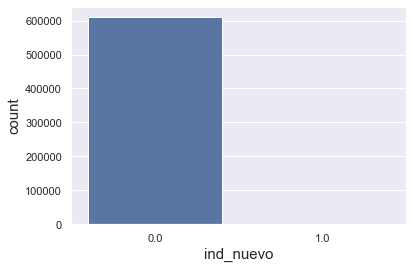

In [44]:
sns.countplot(df['ind_nuevo']);

In [45]:
df['ind_nuevo'].value_counts()

0.0    610315
1.0       398
Name: ind_nuevo, dtype: int64

#### `antiguedad`: Customer seniority (in months)

In [46]:
print(any(df['antiguedad'].isna())) #No missing value
print()
df['antiguedad']

False



0               6
1              35
2              35
3              35
4              35
           ...   
610708         22
610709         22
610710         22
610711         22
610712         22
Name: antiguedad, Length: 610713, dtype: object

In [47]:
#converting to numerical

df['antiguedad'] = df['antiguedad'].astype('int64')

In [48]:
df['antiguedad'].describe()

count    610713.000000
mean         81.022190
std        1810.983246
min     -999999.000000
25%          25.000000
50%          60.000000
75%         142.000000
max         246.000000
Name: antiguedad, dtype: float64

In [49]:
df.query("antiguedad == -999999")

,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,...,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,fecha_alta_year,fecha_alta_month,fecha_alta_date,fecha_alta_day
403021,N,ES,V,66,0.0,-999999,1.0,1.0,A,S,...,0,0,0,0.0,0.0,0,2005,6,8,2
414811,N,ES,V,51,0.0,-999999,1.0,1.0,A,S,...,1,1,0,1.0,1.0,1,1999,7,16,4


there are couple of observations with -999999 as value. This is clearly an error. Hence, these observations will be dropped.

In [50]:
to_drop = df.query("antiguedad == -999999").index

df = df.drop(index = to_drop, axis = 0).reset_index(drop = True)

In [51]:
df['antiguedad'].describe()

count    610711.000000
mean         84.297324
std          65.264106
min           0.000000
25%          25.000000
50%          60.000000
75%         142.000000
max         246.000000
Name: antiguedad, dtype: float64

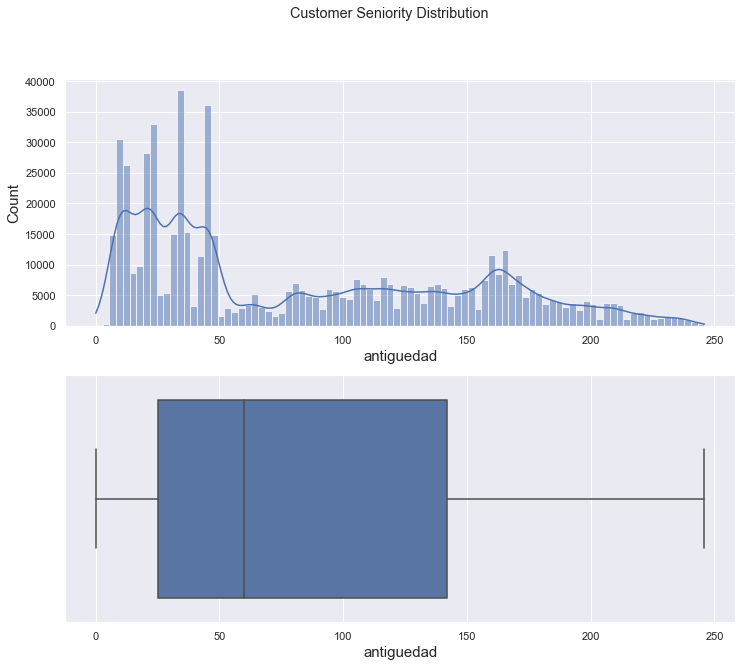

In [52]:
fig, ax = plt.subplots(2,1, figsize = (12,10));

sns.histplot(df['antiguedad'], kde = True, ax = ax[0]);
sns.boxplot(x = 'antiguedad', data = df, ax = ax[1]);

plt.suptitle("Customer Seniority Distribution");

There are no outliers for this variable.

#### `indrel`: 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)

In [53]:
print(any(df['indrel'].isna())) #No missing value
print()
df['indrel'].value_counts()

False



1.0     609938
99.0       773
Name: indrel, dtype: int64

In [54]:
df['indrel'] = df['indrel'].replace(99.0, 0.0)
df['indrel'].value_counts()

1.0    609938
0.0       773
Name: indrel, dtype: int64

In [55]:
print(any(df['indrel_1mes'].isna()))

df['indrel_1mes'].value_counts()

False


1.0    610681
3.0        29
2.0         1
Name: indrel_1mes, dtype: int64

#### `tiprel_1mes`: Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)

In [56]:
print(any(df['tiprel_1mes'].isna()))

df['tiprel_1mes'].value_counts()

False


A    322571
I    288111
P        29
Name: tiprel_1mes, dtype: int64

"P" refers to former customers. Since the bank is only interested in current customers, I will drop observations having `tripel_1mes` has "P".

In [57]:
to_drop = df.query("tiprel_1mes == 'P'").index

df = df.drop(index = to_drop, axis = 0).reset_index(drop = True)
print(df.shape)

(610682, 46)


#### `indresi`: Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)

In [58]:
print(any(df['indresi'].isna()))

df['indresi'].value_counts()

False


S    607009
N      3673
Name: indresi, dtype: int64

In [59]:
df['indresi'] = df['indresi'].map({"S" : 1, "N" : 0})
df['indresi'].value_counts()

1    607009
0      3673
Name: indresi, dtype: int64

#### `indext`: Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)

In [60]:
print(any(df['indext'].isna()))

df['indext'].value_counts()

False


N    583702
S     26980
Name: indext, dtype: int64

In [61]:
df['indext'] = df['indext'].map({"S" : 1, "N" : 0})
df['indext'].value_counts()

0    583702
1     26980
Name: indext, dtype: int64

#### `canal_entrada`: channel used by the customer to join

In [62]:
pd.set_option('display.max_columns', None)
print(df['canal_entrada'].isna().sum())
df[df['canal_entrada'].isna()]

26


,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,fecha_alta_year,fecha_alta_month,fecha_alta_date,fecha_alta_day
29839,N,ES,H,23,1.0,0,0.0,1.0,A,1,0,NaN,N,1.0,45.0,TOLEDO,0.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,7,30,0
55863,N,ES,V,47,1.0,1,1.0,1.0,A,1,0,NaN,N,1.0,25.0,LERIDA,1.0,49707.87,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,12,31,0
96043,N,ES,V,44,0.0,58,1.0,1.0,A,1,0,NaN,N,1.0,28.0,MADRID,1.0,158917.77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,0,2010,8,23,0
97974,N,ES,V,42,1.0,0,1.0,1.0,I,1,0,NaN,N,1.0,28.0,MADRID,1.0,97555.77,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,2010,12,2,3
152969,N,ES,H,21,1.0,0,1.0,1.0,A,1,0,NaN,N,1.0,8.0,BARCELONA,0.0,131768.82,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2014,7,31,3
197387,N,ES,V,32,1.0,0,1.0,1.0,I,1,0,NaN,N,1.0,28.0,MADRID,0.0,31722.21,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,2014,11,19,2
241447,N,ES,H,66,0.0,90,1.0,1.0,A,1,0,NaN,N,1.0,36.0,PONTEVEDRA,0.0,263960.61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,2007,9,14,4
241669,N,ES,V,58,0.0,63,1.0,1.0,A,1,0,NaN,N,1.0,28.0,MADRID,0.0,148147.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,2006,1,28,5
256463,N,ES,V,62,0.0,88,1.0,1.0,A,1,0,NaN,N,1.0,28.0,MADRID,0.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,2005,4,29,4
289804,N,ES,H,57,0.0,59,1.0,1.0,A,1,1,NaN,N,1.0,28.0,MADRID,1.0,528905.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,0,2004,2,4,2


There are 26 observations with missing values.

In [63]:
df.query('pais_residencia == "ES"')['canal_entrada'].value_counts(normalize = True)

KHE    0.336510
KAT    0.269935
KFC    0.241598
KFA    0.033400
KHD    0.009468
         ...   
KGU    0.000002
KGN    0.000002
KCT    0.000002
KDB    0.000002
KDI    0.000002
Name: canal_entrada, Length: 155, dtype: float64

In [64]:
df[df['canal_entrada'].isna()]['tiprel_1mes'].value_counts()

A    20
I     6
Name: tiprel_1mes, dtype: int64

In [65]:
df.query('tiprel_1mes == "A"')['canal_entrada'].value_counts()

KAT    112231
KFC     99796
KHE     52118
KFA     14688
KHK      4674
        ...  
KFV         1
KEF         1
KCX         1
KHO         1
KGN         1
Name: canal_entrada, Length: 148, dtype: int64

All of the observations with missing values are from those customers from Spain. Therefore, I will impute this values with the mode of those customers from Spain.

In [66]:
val = df.query("tiprel_1mes=='A' & pais_residencia=='ES' & nomprov=='MADRID'")['canal_entrada'].mode()[0]

df['canal_entrada'] = df['canal_entrada'].fillna(val)

#### `indfall`: Deceased index. N/S

In [67]:
print(any(df['indfall'].isna()))

df['indfall'].value_counts()

False


N    609096
S      1586
Name: indfall, dtype: int64

In [68]:
df['indfall'] = df['indfall'].map({"S" : 1, "N" : 0})
df['indfall'].value_counts()

0    609096
1      1586
Name: indfall, dtype: int64

#### `tipodom`: Address type. 1, primary address

In [69]:
print(any(df['tipodom'].isna()))

df['tipodom'].value_counts()

False


1.0    610682
Name: tipodom, dtype: int64

Since there is only one category for this variable, I will drop this.

In [70]:
df = df.drop('tipodom', axis = 1)
print(df.shape)

(610682, 45)


#### `cod_prov` & `nomprov`: Province code (customer's address) / Province name

In [71]:
df['cod_prov'].value_counts()

28.0    201313
8.0      52846
41.0     28709
46.0     28704
15.0     19420
30.0     17229
29.0     17177
50.0     15630
11.0     13800
3.0      13371
36.0     12630
33.0     11947
47.0     10952
35.0     10506
6.0       8947
48.0      8450
45.0      8114
18.0      7823
37.0      7620
39.0      6846
14.0      6758
10.0      6243
21.0      6007
13.0      5490
2.0       5212
7.0       4979
12.0      4561
9.0       4356
32.0      3950
27.0      3935
31.0      3840
26.0      3803
43.0      3795
17.0      3748
24.0      3699
25.0      3355
20.0      3190
38.0      2993
23.0      2845
16.0      2754
4.0       2570
19.0      2568
49.0      2361
34.0      2263
40.0      1917
22.0      1790
5.0       1778
1.0       1665
44.0      1042
42.0       758
52.0       437
51.0       314
Name: cod_prov, dtype: int64

In [72]:
df['nomprov'].value_counts()

MADRID                    201313
BARCELONA                  52846
SEVILLA                    28709
VALENCIA                   28704
CORUÑA, A                  19420
MURCIA                     17229
MALAGA                     17177
ZARAGOZA                   15630
CADIZ                      13800
ALICANTE                   13371
PONTEVEDRA                 12630
ASTURIAS                   11947
VALLADOLID                 10952
PALMAS, LAS                10506
BADAJOZ                     8947
BIZKAIA                     8450
TOLEDO                      8114
GRANADA                     7823
SALAMANCA                   7620
CANTABRIA                   6846
CORDOBA                     6758
CACERES                     6243
HUELVA                      6007
CIUDAD REAL                 5490
ALBACETE                    5212
BALEARS, ILLES              4979
CASTELLON                   4561
BURGOS                      4356
OURENSE                     3950
LUGO                        3935
NAVARRA   

Both of these variables are same since one `nomprov` is the name of the province and `cod_prov` is the number assigned to the province. Hence I will remove `cod_prov`.

In [73]:
df = df.drop('cod_prov', axis = 1)
df.shape

(610682, 44)

In [74]:
print(df['nomprov'].isna().sum())
df[df['nomprov'].isna()]

3672


,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,nomprov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,fecha_alta_year,fecha_alta_month,fecha_alta_date,fecha_alta_day
1980,N,CA,V,53,0.0,35,1.0,1.0,A,0,0,KAT,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,0.0,1,2012,8,10,4
4041,N,CH,V,34,0.0,35,1.0,1.0,A,0,0,KFC,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,20,0
4239,N,CL,V,40,0.0,35,1.0,1.0,A,0,0,KAT,0,NaN,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,29,2
5755,N,IE,V,28,0.0,35,1.0,1.0,A,0,0,KFC,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.0,0.0,0,2012,8,6,0
14671,N,AT,V,43,0.0,34,1.0,1.0,A,0,1,KFA,0,NaN,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,1,2012,9,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583617,N,DE,V,43,0.0,20,1.0,1.0,A,0,0,KFC,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.0,0.0,0,2013,11,25,0
588297,N,ES,V,45,0.0,19,1.0,1.0,A,1,0,KFC,0,NaN,1.0,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0,1.0,1,2013,12,27,4
591625,N,DE,V,38,0.0,19,1.0,1.0,A,0,0,KAT,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0.0,0.0,0,2013,12,13,4
603710,N,GB,V,36,0.0,19,1.0,1.0,A,0,0,KAT,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2013,7,11,3


There are about 3k missing values for this column. Most of the customers are not from Spain. Therefore, I will impute this column with the mode of the category of customers outside of Spain.

In [75]:
df[df['nomprov'].isna()]['pais_residencia'].value_counts()

FR    286
AR    276
DE    255
GB    254
CO    201
     ... 
KZ      1
CD      1
CF      1
BZ      1
GE      1
Name: pais_residencia, Length: 113, dtype: int64

In [76]:
df.query('pais_residencia != "ES"')['nomprov'].value_counts()

MADRID         4
GUADALAJARA    1
PALMAS, LAS    1
Name: nomprov, dtype: int64

In [77]:
#Imputing for thise customers from Spain.
(df[df['nomprov'].isna()]['pais_residencia'] == "ES").sum()

5

In [78]:
%%time

# Imputing for those customers outside of Spain
for i in df[df['nomprov'].isna()].index:
    if df['pais_residencia'][i] != "ES":
        df['nomprov'][i] = "Foreign"
    else:
        df['nomprov'][i] = "MADRID"

Wall time: 5.03 s


#### `ind_actividad_cliente`: Activity index (1, active customer; 0, inactive customer)

In [79]:
print(any(df['ind_actividad_cliente'].isna()))

df['ind_actividad_cliente'].value_counts()

False


1.0    331347
0.0    279335
Name: ind_actividad_cliente, dtype: int64

#### `renta`: Gross income of the household

In [80]:
df['renta'].isna().sum()

96601

Around 100k+ missing values. 

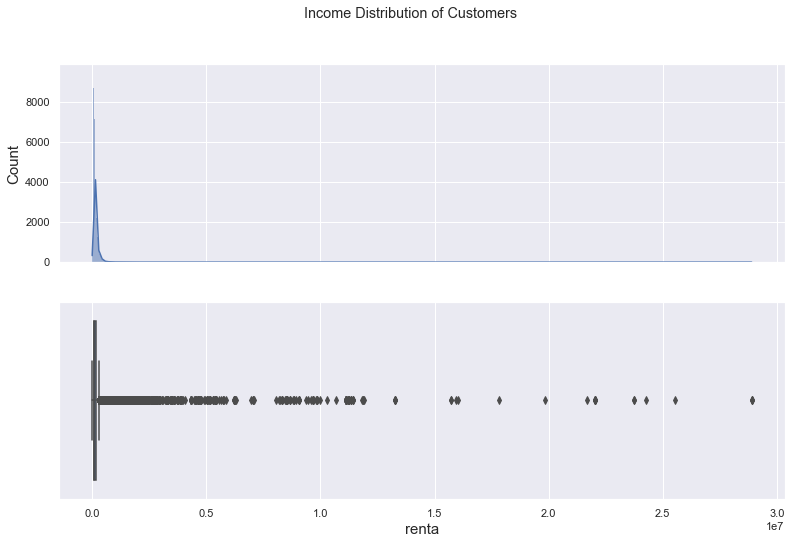

In [81]:
fig, ax = plt.subplots(2,1, figsize = (13,8), sharex = True);

sns.histplot(df['renta'], kde = True, ax = ax[0]);
sns.boxplot(x = 'renta', data = df, ax = ax[1]);

plt.suptitle("Income Distribution of Customers");

In [82]:
df['renta'].describe()

count    5.140810e+05
mean     1.346062e+05
std      2.257407e+05
min      1.202730e+03
25%      6.919950e+04
50%      1.026189e+05
75%      1.570557e+05
max      2.889440e+07
Name: renta, dtype: float64

We can see that the distribution is extremely skewed. Only fewer households earns income higher than 100k. Therefore imputing this variable with mean would not be the right approach. 

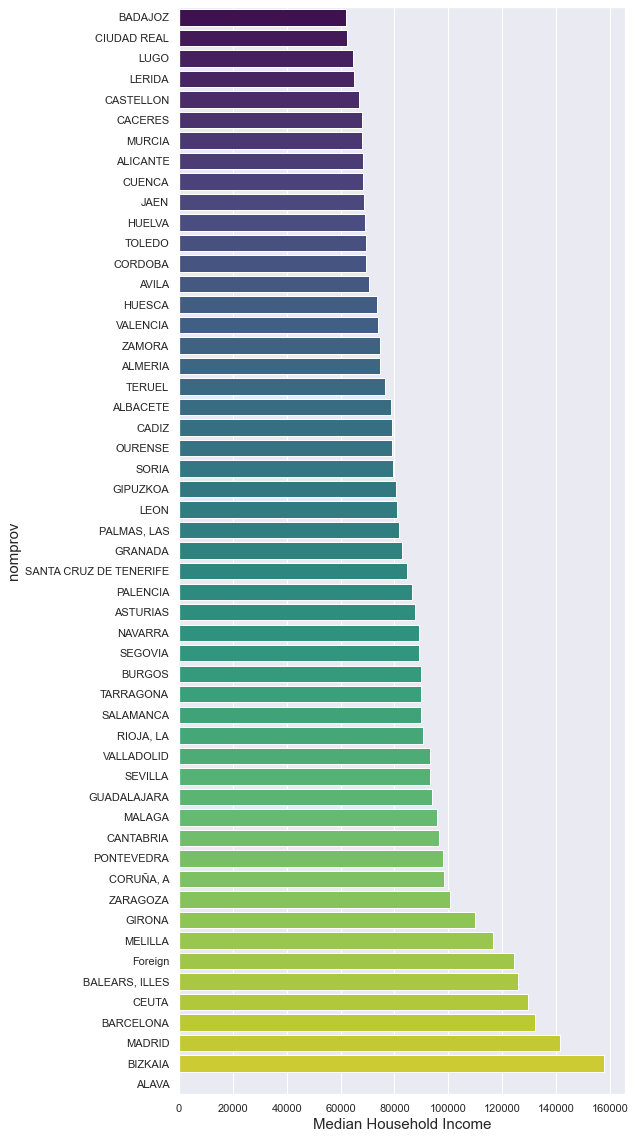

In [83]:
temp_df = df.groupby('nomprov').agg({'renta' : 'median'}).sort_values('renta').reset_index()

plt.figure(figsize = (8, 20));
sns.barplot(x = 'renta', y = 'nomprov', data = temp_df, palette = "viridis");
plt.xlabel("Median Household Income");

We can see certain cities have higher median income compared to other cities. Therefore, I will impute this variable by filtering by province and then taking the median income of that province.

In [84]:
%%time
for city in df['nomprov'].unique():
    if city == "ALAVA":
        df.loc[(df['nomprov'] == f"{city}") & (df['renta'].isna()), "renta"] = \
        df['renta'].median()
    else:
        df.loc[(df['nomprov'] == f"{city}") & (df['renta'].isna()), "renta"] = \
        df.query(f'nomprov == "{city}"')['renta'].median()

Wall time: 4.28 s


In [85]:
df.isna().sum()

ind_empleado              0
pais_residencia           0
sexo                      0
age                       0
ind_nuevo                 0
antiguedad                0
indrel                    0
indrel_1mes               0
tiprel_1mes               0
indresi                   0
indext                    0
canal_entrada             0
indfall                   0
nomprov                   0
ind_actividad_cliente     0
renta                     0
ind_ahor_fin_ult1         0
ind_aval_fin_ult1         0
ind_cco_fin_ult1          0
ind_cder_fin_ult1         0
ind_cno_fin_ult1          0
ind_ctju_fin_ult1         0
ind_ctma_fin_ult1         0
ind_ctop_fin_ult1         0
ind_ctpp_fin_ult1         0
ind_deco_fin_ult1         0
ind_deme_fin_ult1         0
ind_dela_fin_ult1         0
ind_ecue_fin_ult1         0
ind_fond_fin_ult1         0
ind_hip_fin_ult1          0
ind_plan_fin_ult1         0
ind_pres_fin_ult1         0
ind_reca_fin_ult1         0
ind_tjcr_fin_ult1         0
ind_valo_fin_ult1   

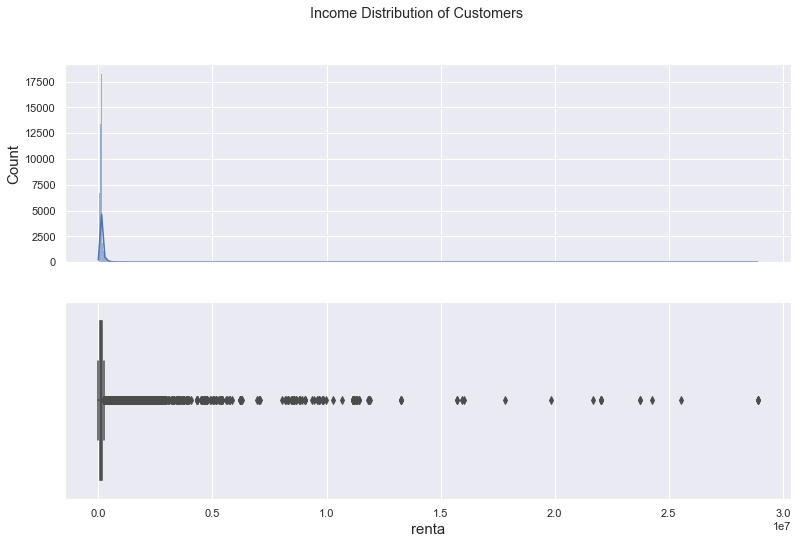

In [86]:
fig, ax = plt.subplots(2,1, figsize = (13,8), sharex = True);

sns.histplot(df['renta'], kde = True, ax = ax[0]);
sns.boxplot(x = 'renta', data = df, ax = ax[1]);

plt.suptitle("Income Distribution of Customers");

In [87]:
df['renta'].describe()

count    6.106820e+05
mean     1.298273e+05
std      2.077581e+05
min      1.202730e+03
25%      7.124269e+04
50%      9.939778e+04
75%      1.477217e+05
max      2.889440e+07
Name: renta, dtype: float64

There are extreme outliers for this variable. Therefore, I have created a class that applies different transformation techniques and visualizes its distribution. We can try to see which transformation helps transform the variable into a nearly normal distribution.

In [88]:
class num_transformer:
    def __init__(self, x, variable):
        self.x = x
        self.variable = variable

    def var_transform_plots(self):
    
        import scipy.stats as stats

        fig, ax = plt.subplots(1,3, figsize = (15,5))

        sns.histplot(self.x[self.variable], kde = True, ax = ax[0]);
        sns.boxplot(self.x[self.variable], ax = ax[1]);
        stats.probplot(self.x[self.variable], dist="norm", plot=plt);
        plt.suptitle('Current Distribution', fontsize = 20)

        import feature_engine.transformation as vt
        
        self.log = vt.LogTransformer()
        self.recipr = vt.ReciprocalTransformer()
        self.exp = vt.PowerTransformer()
        self.boxcox = vt.BoxCoxTransformer()
        self.yeojohn = vt.YeoJohnsonTransformer()
        
        transformation_dict = dict(
            log = self.log, 
            reciper = self.recipr, 
            exp = self.exp, 
            boxcox = self.boxcox, 
            yeojohn = self.yeojohn 
        )

        for name, trnfm in transformation_dict.items():
            try:
                self.x[name + '_' + self.variable] = trnfm.fit_transform(self.x[self.variable].to_frame())

            except ValueError:
                print(f"""
                      Some variables contain zero or negative values, can't apply {type(trnfm).__name__}
                """)
                continue

            else:
                fig, ax = plt.subplots(1,3, figsize = (15,5))
                sns.histplot(self.x[name + '_' + self.variable], 
                             kde = True, ax = ax[0]).set(xlabel=self.variable);
                
                sns.boxplot(self.x[name + '_' + self.variable], 
                            ax = ax[1]).set(xlabel=self.variable);
                
                stats.probplot(self.x[name + '_' + self.variable], 
                               dist="norm", 
                               plot=plt);
                
                plt.suptitle(type(trnfm).__name__, fontsize = 20)
                plt.show()
         
        print("#" * len('Normality Tests:'))
        print('Normality Tests:')        
        print("#" * len('Normality Tests:'))
        print()
        print("Null hypothesis: Variable comes from a normal distribution")
        print()
        
        cols = self.x.iloc[:, -5:].columns
        alpha = 1e-3
        
        for col in cols:
            k2, p = stats.normaltest(self.x[col].values)
            print(f'{col} P-Val: {p:.4f}')
            if p < alpha: 
                print(f"Reject H0, {col} is not normally distributed")
            else:
                print(f"Cannot Reject H0, {col} is normally distributed")
            print()

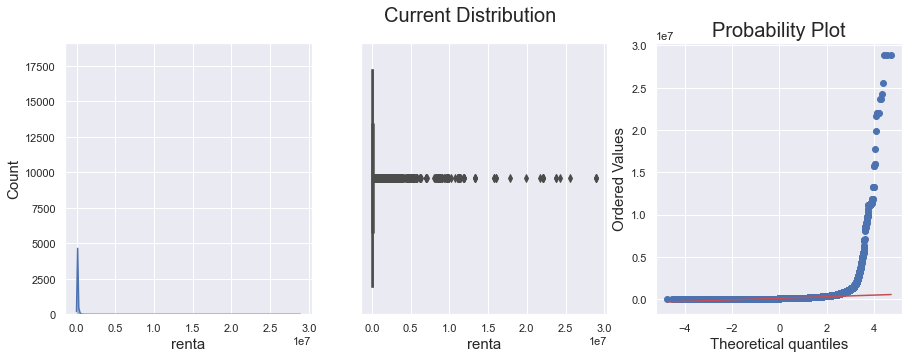

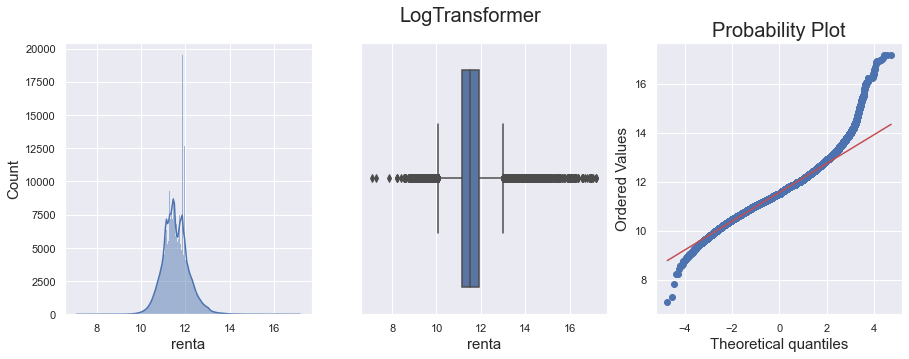

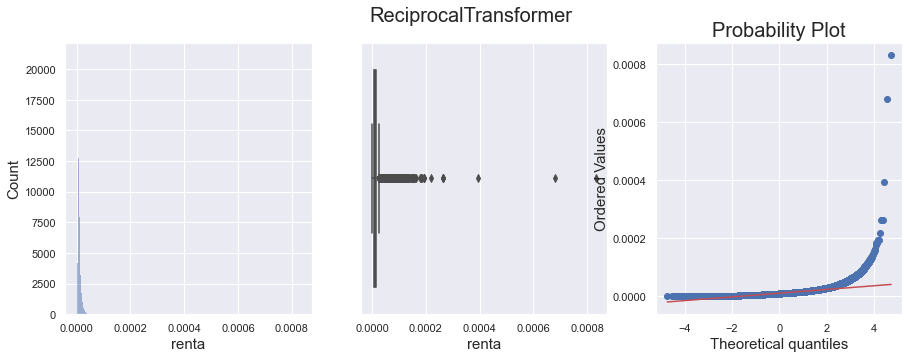

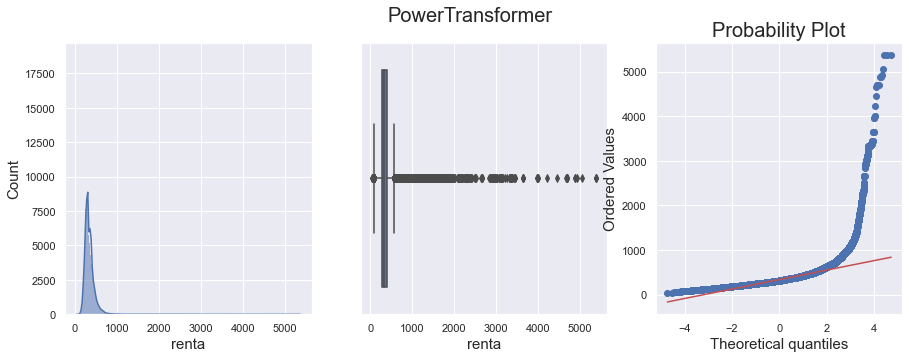

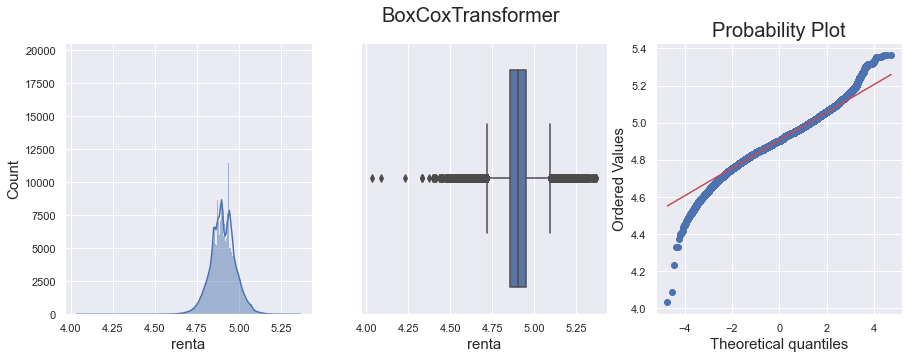

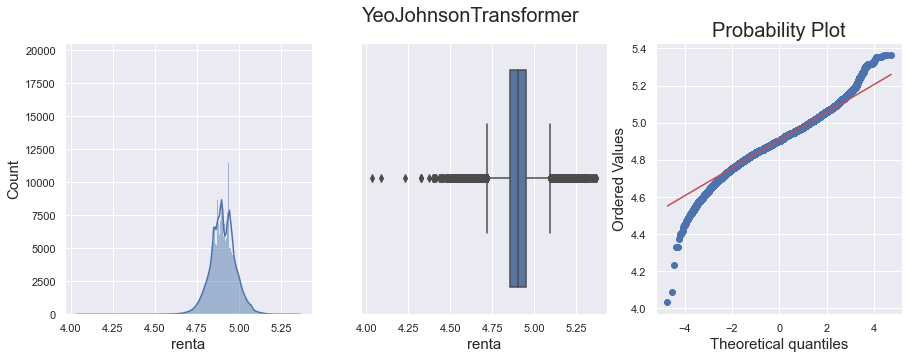

################
Normality Tests:
################

Null hypothesis: Variable comes from a normal distribution

log_renta P-Val: 0.0000
Reject H0, log_renta is not normally distributed

reciper_renta P-Val: 0.0000
Reject H0, reciper_renta is not normally distributed

exp_renta P-Val: 0.0000
Reject H0, exp_renta is not normally distributed

boxcox_renta P-Val: 0.0000
Reject H0, boxcox_renta is not normally distributed

yeojohn_renta P-Val: 0.0000
Reject H0, yeojohn_renta is not normally distributed



In [89]:
num_transformer(df, "renta").var_transform_plots()

BoxCox and YeoJohnson transformer seems to do the job. Although its not normal distribution, it is somewhat close enough.

In [90]:
df = df.drop(['renta', 'log_renta', 'reciper_renta', 'exp_renta', 'yeojohn_renta'], axis = 1)

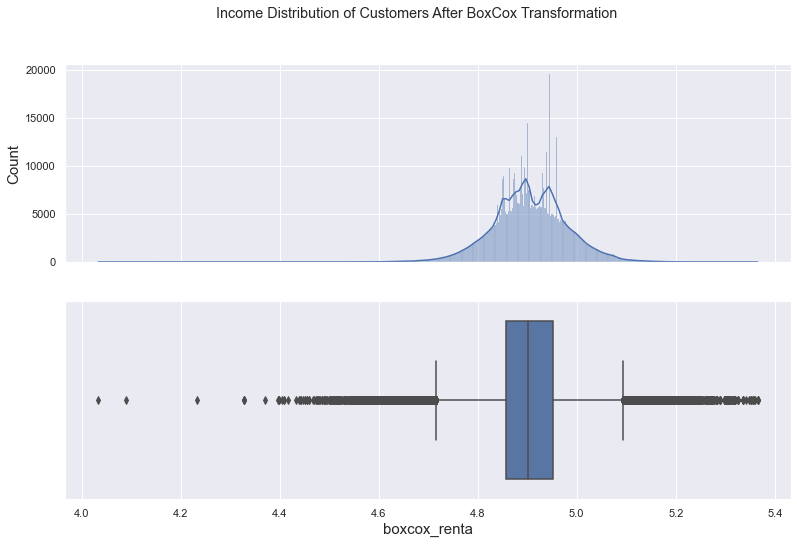

In [91]:
fig, ax = plt.subplots(2,1, figsize = (13,8), sharex = True);

sns.histplot(df['boxcox_renta'], kde = True, ax = ax[0]);
sns.boxplot(x = 'boxcox_renta', data = df, ax = ax[1]);

plt.suptitle("Income Distribution of Customers After BoxCox Transformation");

In [92]:
df.shape

(610682, 44)

Next, I will winsorize the remaining outliers. Winsoring helps distribute the outliers to the end of normal distribution.

In [93]:
from feature_engine.outliers import Winsorizer

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['boxcox_renta'])

df = windsoriser.fit_transform(df)

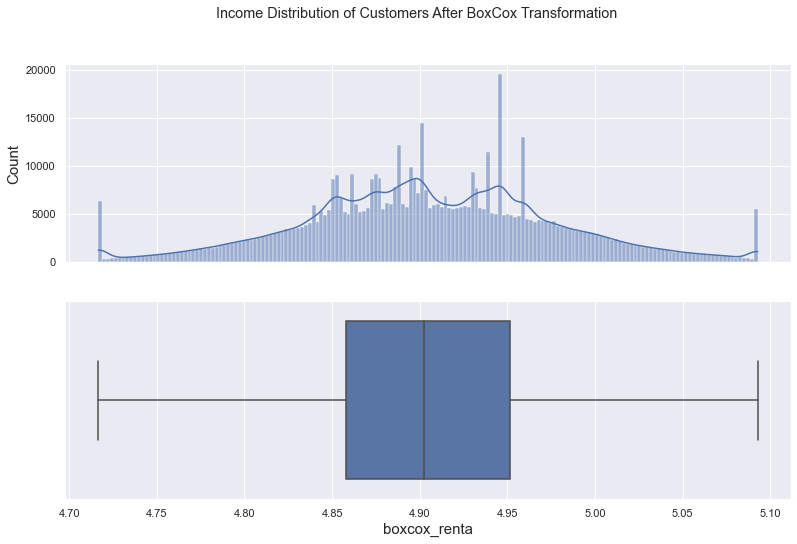

In [94]:
fig, ax = plt.subplots(2,1, figsize = (13,8), sharex = True);

sns.histplot(df['boxcox_renta'], kde = True, ax = ax[0]);
sns.boxplot(x = 'boxcox_renta', data = df, ax = ax[1]);

plt.suptitle("Income Distribution of Customers After BoxCox Transformation");

We can see a spike in values at either ends of the distribution. Winsorizing helped re-distribute the outliers to the ends of the normal distribution.

In [95]:
df.shape

(610682, 44)

### Bank Products

In [96]:
prod_cols = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 
             'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
             'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 
             'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 
             'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
             'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

labels = [
    "Saving Account", "Guarantees", "Current Accounts", "Derivada Account", "Payroll Account",
    "Junior Account", "Más particular Account", "particular Account", "particular Plus Account",
    "Short-term deposits", "Medium-term deposits", "Long-term deposits", "e-account", 
    "Funds", "Mortgage", "Pensions", "Loans", "Taxes", "Credit Card", "Securities", 
    "Home Account", "Payroll", "Pensions", "Direct Debit"
]

In [97]:
for col, name  in zip(prod_cols, labels):
    print(col, ":", name)
    print("-" * 50)
    print(f'Missing Values: {df[col].isna().sum()}')
    print("Value Counts")
    print(df[col].value_counts())
    print()

ind_ahor_fin_ult1 : Saving Account
--------------------------------------------------
Missing Values: 0
Value Counts
0    610593
1        89
Name: ind_ahor_fin_ult1, dtype: int64

ind_aval_fin_ult1 : Guarantees
--------------------------------------------------
Missing Values: 0
Value Counts
0    610662
1        20
Name: ind_aval_fin_ult1, dtype: int64

ind_cco_fin_ult1 : Current Accounts
--------------------------------------------------
Missing Values: 0
Value Counts
1    476525
0    134157
Name: ind_cco_fin_ult1, dtype: int64

ind_cder_fin_ult1 : Derivada Account
--------------------------------------------------
Missing Values: 0
Value Counts
0    610382
1       300
Name: ind_cder_fin_ult1, dtype: int64

ind_cno_fin_ult1 : Payroll Account
--------------------------------------------------
Missing Values: 0
Value Counts
0    551485
1     59197
Name: ind_cno_fin_ult1, dtype: int64

ind_ctju_fin_ult1 : Junior Account
--------------------------------------------------
Missing Values: 0

Only 2 columns featuring certain bank products have missing values. I will impute these with the mode again.

In [98]:
df['ind_nomina_ult1'] = df['ind_nomina_ult1'].fillna(df['ind_nomina_ult1'].mode()[0])
df['ind_nom_pens_ult1'] = df['ind_nom_pens_ult1'].fillna(df['ind_nom_pens_ult1'].mode()[0])

In [99]:
df.isna().sum()

ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
ind_nuevo                0
antiguedad               0
indrel                   0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
canal_entrada            0
indfall                  0
nomprov                  0
ind_actividad_cliente    0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
ind_fond_fin_ult1        0
ind_hip_fin_ult1         0
ind_plan_fin_ult1        0
ind_pres_fin_ult1        0
ind_reca_fin_ult1        0
ind_tjcr_fin_ult1        0
ind_valo_fin_ult1        0
ind_viv_fin_ult1         0
ind_nomina_ult1          0
i

### All missing values has been taken care of!

In [100]:
product_df = df.groupby('age').agg({col : 'sum' for col in prod_cols})
product_df

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
age,,,,,,,,,,,,,,,,,,,,,,,,
18,0,0,13,0,0,7235,0,1,0,0,0,34,0,0,2,0,0,10,0,0,0,2.0,18.0,0
20,0,0,7566,0,97,286,21,0,0,8,0,9,252,2,0,0,0,2,6,4,0,23.0,26.0,154
21,0,0,26714,0,286,0,9,0,0,6,2,37,488,11,0,0,0,19,22,8,0,109.0,131.0,693
22,0,0,32642,0,446,1,2,0,0,5,1,48,580,15,0,1,1,48,28,13,0,173.0,202.0,1194
23,0,0,36647,0,652,2,16,302,1,0,1,49,347,17,0,2,0,74,66,23,0,267.0,299.0,1437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0,0,1177,1,79,0,27,791,106,2,14,273,194,83,0,4,1,67,44,88,3,3.0,73.0,124
82,0,0,1059,1,68,0,20,703,84,6,7,194,178,67,0,2,0,59,45,75,3,2.0,64.0,103
83,0,0,994,0,60,0,17,649,84,3,7,207,151,56,0,3,1,40,28,67,1,3.0,56.0,90


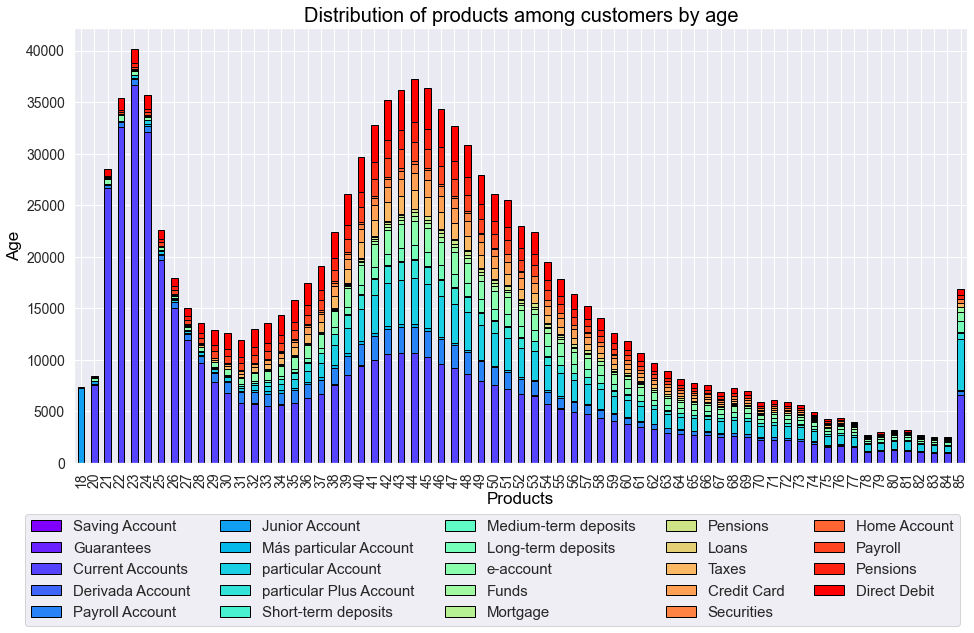

In [101]:
product_df.plot(kind='bar', stacked=True, fontsize=14, figsize=[16,8], colormap='rainbow', 
               edgecolor = "black")
plt.title('Distribution of products among customers by age', fontsize=20, color='black') 
plt.xlabel('Products', fontsize=17, color='black') 
plt.ylabel('Age', fontsize=17, color='black') 
# plt.ticklabel_format(style = 'plain')
plt.legend(labels = labels, prop={'size':15}, loc=1, bbox_to_anchor=(1.0, -0.1), ncol = 5);

Above graph referred from [here](https://medium.com/@ravitee/santander-product-recommendation-ee4122d15072)

In [102]:
#Proportion of products by age of customers
prod_prop = product_df.div(product_df.sum(axis = 1), axis = 0)

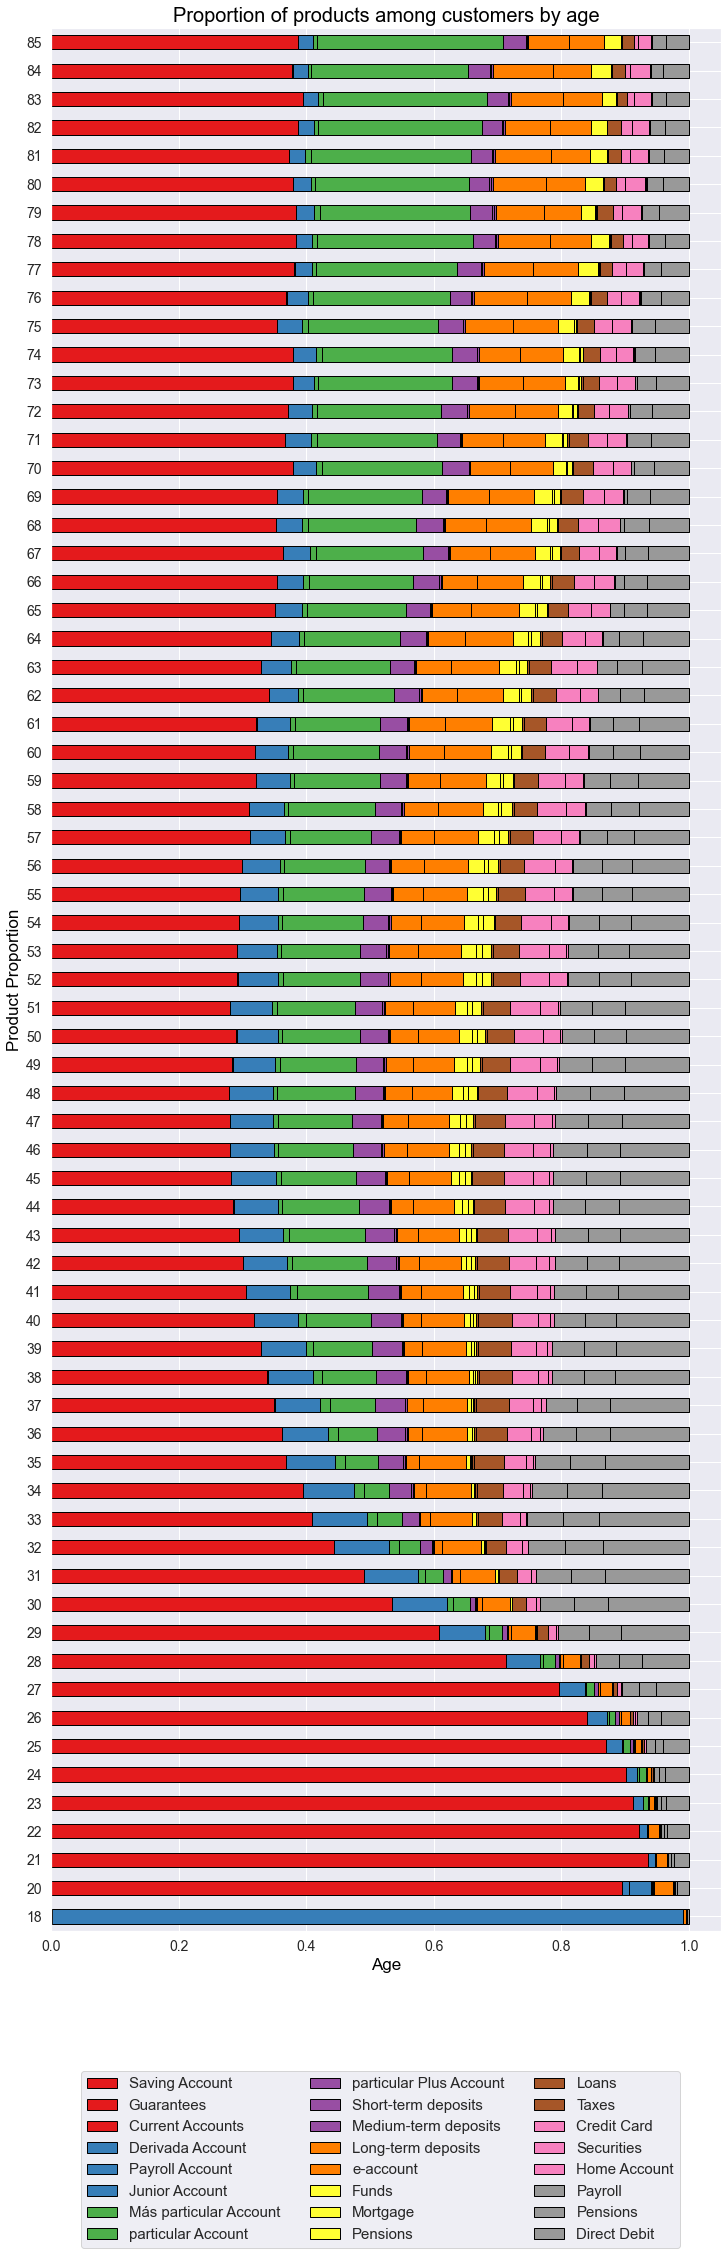

In [103]:
prod_prop.plot(kind = 'barh', stacked = True, fontsize=14, figsize=[12,35], colormap='Set1', 
               edgecolor = "black");

plt.title('Proportion of products among customers by age', fontsize=20, color='black') ;
plt.xlabel('Age', fontsize=17, color='black') ;
plt.ylabel('Product Proportion', fontsize=17, color='black') ;
plt.legend(labels = labels, prop={'size':15}, loc=1, bbox_to_anchor=(0.95, -0.07), ncol = 3);

Customer with age above 25 opt for more products from the bank.

The above clearly shows some customers hold multiple accounts. A new variable will be created that sums all the products together to see the total number of accounts a customer holds.

In [104]:
df['total_accounts'] = df.iloc[:, 15:-6].sum(axis = 1)

In [105]:
df['total_accounts'].value_counts()

1.0     397529
2.0      99981
3.0      42751
4.0      22017
0.0      17296
5.0      14033
6.0       9048
7.0       4751
8.0       2168
9.0        764
10.0       255
11.0        72
12.0        13
13.0         3
14.0         1
Name: total_accounts, dtype: int64

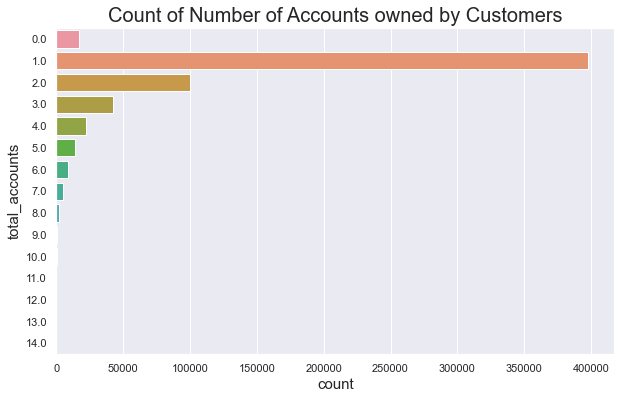

In [106]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'total_accounts', data = df);
plt.title("Count of Number of Accounts owned by Customers");

Majority of the customers only hold a single account. But there are considerable other customers holding multiple accounts.

In [107]:
df.duplicated().sum()

691

Dropping remaining duplicated rows.

In [108]:
df = df.drop_duplicates().reset_index(drop = True)

#### Categorical Encoding

In order to reduce the number of categories, I will group them by similarity.

In [109]:
len(df['pais_residencia'].unique())

113

In [110]:
df['pais_residencia'].unique()

array(['ES', 'CA', 'CH', 'CL', 'IE', 'AT', 'NL', 'FR', 'GB', 'DE', 'DO',
       'BE', 'AR', 'VE', 'US', 'MX', 'BR', 'IT', 'EC', 'PE', 'CO', 'HN',
       'FI', 'SE', 'AL', 'PT', 'MZ', 'CN', 'TW', 'PL', 'IN', 'CR', 'NI',
       'HK', 'AE', 'MA', 'GR', 'PR', 'RO', 'IL', 'RU', 'GT', 'GA', 'NO',
       'SN', 'MR', 'UA', 'BG', 'PY', 'EE', 'SV', 'CZ', 'ET', 'CM', 'SA',
       'CI', 'QA', 'SG', 'BO', 'BZ', 'UY', 'MD', 'BA', 'CF', 'KR', 'LU',
       'NG', 'CD', 'ZA', 'AU', 'KZ', 'CU', 'DK', 'JP', 'SK', 'GM', 'AO',
       'HR', 'PK', 'PA', 'MK', 'LY', 'LT', 'TH', 'GQ', 'GN', 'TR', 'IS',
       'KE', 'VN', 'RS', 'AD', 'NZ', 'OM', 'EG', 'LV', 'ML', 'CG', 'GW',
       'HU', 'DZ', 'SL', 'GI', 'KH', 'MM', 'BY', 'PH', 'KW', 'GH', 'TN',
       'TG', 'LB', 'GE'], dtype=object)

There are 113 countries. I will combine some categories by continent. Only ES will be kept separate.

In [111]:
#importing country by continent data

url = "https://pkgstore.datahub.io/JohnSnowLabs/country-and-continent-codes-list/country-and-continent-codes-list-csv_csv/data/b7876b7f496677669644f3d1069d3121/country-and-continent-codes-list-csv_csv.csv"

country = pd.read_csv(url)
country

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
...,...,...,...,...,...,...
257,Africa,AF,"Zambia, Republic of",ZM,ZMB,894.0
258,Oceania,OC,Disputed Territory,XX,NaN,NaN
259,Asia,AS,Iraq-Saudi Arabia Neutral Zone,XE,NaN,NaN
260,Asia,AS,United Nations Neutral Zone,XD,NaN,NaN


In [112]:
#There are some missing values. This is actually because pandas sees "NA" and 
#considers these as missing values.

country[country['Two_Letter_Country_Code'].isna()]

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
152,Africa,AF,"Namibia, Republic of",NaN,NAM,516.0


In [113]:
country['Two_Letter_Country_Code'] = country['Two_Letter_Country_Code'].fillna("NA")

In [114]:
country['Two_Letter_Country_Code'].unique()

array(['AF', 'AL', 'AQ', 'DZ', 'AS', 'AD', 'AO', 'AG', 'AZ', 'AR', 'AU',
       'AT', 'BS', 'BH', 'BD', 'AM', 'BB', 'BE', 'BM', 'BT', 'BO', 'BA',
       'BW', 'BV', 'BR', 'BZ', 'IO', 'SB', 'VG', 'BN', 'BG', 'MM', 'BI',
       'BY', 'KH', 'CM', 'CA', 'CV', 'KY', 'CF', 'LK', 'TD', 'CL', 'CN',
       'TW', 'CX', 'CC', 'CO', 'KM', 'YT', 'CG', 'CD', 'CK', 'CR', 'HR',
       'CU', 'CY', 'CZ', 'BJ', 'DK', 'DM', 'DO', 'EC', 'SV', 'GQ', 'ET',
       'ER', 'EE', 'FO', 'FK', 'GS', 'FJ', 'FI', 'AX', 'FR', 'GF', 'PF',
       'TF', 'DJ', 'GA', 'GE', 'GM', 'PS', 'DE', 'GH', 'GI', 'KI', 'GR',
       'GL', 'GD', 'GP', 'GU', 'GT', 'GN', 'GY', 'HT', 'HM', 'VA', 'HN',
       'HK', 'HU', 'IS', 'IN', 'ID', 'IR', 'IQ', 'IE', 'IL', 'IT', 'CI',
       'JM', 'JP', 'KZ', 'JO', 'KE', 'KP', 'KR', 'KW', 'KG', 'LA', 'LB',
       'LS', 'LV', 'LR', 'LY', 'LI', 'LT', 'LU', 'MO', 'MG', 'MW', 'MY',
       'MV', 'ML', 'MT', 'MQ', 'MR', 'MU', 'MX', 'MC', 'MN', 'MD', 'ME',
       'MS', 'MA', 'MZ', 'OM', 'NA', 'NR', 'NP', 'N

In [126]:
country['Continent_Code'].unique()

array(['AS', 'EU', 'AN', 'AF', 'OC', 'NA', 'SA'], dtype=object)

In [115]:
country[country['Continent_Code'].isna()]

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
7,North America,NaN,Antigua and Barbuda,AG,ATG,28.0
13,North America,NaN,"Bahamas, Commonwealth of the",BS,BHS,44.0
18,North America,NaN,Barbados,BB,BRB,52.0
20,North America,NaN,Bermuda,BM,BMU,60.0
27,North America,NaN,Belize,BZ,BLZ,84.0
30,North America,NaN,British Virgin Islands,VG,VGB,92.0
38,North America,NaN,Canada,CA,CAN,124.0
40,North America,NaN,Cayman Islands,KY,CYM,136.0
55,North America,NaN,"Costa Rica, Republic of",CR,CRI,188.0
57,North America,NaN,"Cuba, Republic of",CU,CUB,192.0


All of these countries belong to the continent of North America

In [116]:
country['Continent_Code'] = country['Continent_Code'].fillna("NA")

In [117]:
country = country[['Continent_Code', 'Two_Letter_Country_Code']]
country

,Continent_Code,Two_Letter_Country_Code
0,AS,AF
1,EU,AL
2,AN,AQ
3,AF,DZ
4,OC,AS
...,...,...
257,AF,ZM
258,OC,XX
259,AS,XE
260,AS,XD


In [118]:
#Removing ES from country df. This is done in order to not group ES under EU continent.
to_drop = country.query("Two_Letter_Country_Code == 'ES'").index

country = country.drop(index = to_drop, axis = 0).reset_index(drop = True)

In [119]:
np.setdiff1d(df['pais_residencia'].unique(), country['Two_Letter_Country_Code'].unique())

array(['ES'], dtype=object)

In [120]:
country.loc[country['Two_Letter_Country_Code'] == 'US', 'Continent_Code']

247    NA
Name: Continent_Code, dtype: object

In [121]:
%%time
for i in df['pais_residencia'].unique():
    if i == "ES":
        pass
    else:
        df.loc[df['pais_residencia'] == i, "pais_residencia"] = \
        country.loc[country['Two_Letter_Country_Code'] == i, 'Continent_Code'].unique()[0]

Wall time: 5.13 s


In [122]:
df

,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,nomprov,ind_actividad_cliente,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,fecha_alta_year,fecha_alta_month,fecha_alta_date,fecha_alta_day,boxcox_renta,total_accounts
0,N,ES,H,35,0.0,6,1.0,1.0,A,1,0,KHL,0,MALAGA,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2015,1,12,0,4.885048,1.0
1,N,ES,V,23,0.0,35,1.0,1.0,I,1,1,KHE,0,CIUDAD REAL,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,10,4,4.755950,1.0
2,N,ES,V,23,0.0,35,1.0,1.0,I,1,0,KHE,0,CIUDAD REAL,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,10,4,4.928461,1.0
3,N,ES,H,22,0.0,35,1.0,1.0,I,1,0,KHD,0,ZARAGOZA,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,10,4,4.925974,1.0
4,N,ES,V,23,0.0,35,1.0,1.0,A,1,0,KHE,0,ZARAGOZA,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,10,4,4.903875,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609986,N,ES,H,27,0.0,22,1.0,1.0,A,1,0,KFC,0,MADRID,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,2013,9,25,2,4.822642,0.0
609987,N,ES,H,56,0.0,22,1.0,1.0,A,1,0,KFC,0,"CORUÑA, A",1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2013,9,25,2,4.865936,1.0
609988,N,ES,V,39,0.0,22,1.0,1.0,A,1,0,KFC,0,"CORUÑA, A",1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,2013,9,25,2,4.874562,1.0
609989,N,ES,V,36,0.0,22,1.0,1.0,A,1,1,KFC,0,MADRID,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,2013,9,25,2,4.828461,1.0


In [124]:
df['pais_residencia'].unique()

array(['ES', 'NA', 'EU', 'AS', 'AF', 'SA', 'OC'], dtype=object)

In [125]:
df['pais_residencia'].value_counts()

ES    606318
EU      1762
AS      1185
NA       483
SA       113
AF       103
OC        27
Name: pais_residencia, dtype: int64

From 103 categories, we have grouped countries (except ES) by continent.

In [133]:
len(df['canal_entrada'].unique())

156

In [138]:
np.sort(df['canal_entrada'].unique())

array(['004', '007', '013', 'K00', 'KAA', 'KAB', 'KAC', 'KAD', 'KAE',
       'KAF', 'KAG', 'KAH', 'KAI', 'KAJ', 'KAK', 'KAL', 'KAM', 'KAN',
       'KAO', 'KAP', 'KAQ', 'KAR', 'KAS', 'KAT', 'KAU', 'KAV', 'KAW',
       'KAY', 'KAZ', 'KBB', 'KBD', 'KBE', 'KBF', 'KBG', 'KBH', 'KBJ',
       'KBL', 'KBM', 'KBN', 'KBO', 'KBP', 'KBQ', 'KBR', 'KBS', 'KBU',
       'KBV', 'KBW', 'KBX', 'KBY', 'KBZ', 'KCA', 'KCB', 'KCC', 'KCD',
       'KCE', 'KCF', 'KCG', 'KCH', 'KCI', 'KCJ', 'KCK', 'KCL', 'KCM',
       'KCN', 'KCO', 'KCP', 'KCQ', 'KCR', 'KCS', 'KCT', 'KCU', 'KCV',
       'KCX', 'KDA', 'KDB', 'KDC', 'KDD', 'KDE', 'KDF', 'KDG', 'KDH',
       'KDI', 'KDM', 'KDN', 'KDO', 'KDP', 'KDQ', 'KDR', 'KDS', 'KDT',
       'KDU', 'KDV', 'KDW', 'KDX', 'KDY', 'KDZ', 'KEA', 'KEB', 'KEC',
       'KED', 'KEE', 'KEF', 'KEG', 'KEH', 'KEI', 'KEJ', 'KEK', 'KEL',
       'KEM', 'KEN', 'KEO', 'KEQ', 'KES', 'KEU', 'KEV', 'KEW', 'KEY',
       'KEZ', 'KFA', 'KFB', 'KFC', 'KFD', 'KFE', 'KFF', 'KFG', 'KFH',
       'KFI', 'KFJ',

In [143]:
df['canal_entrada'].value_counts()

KHE    204223
KAT    165191
KFC    146923
KFA     20804
KHD      5790
        ...  
KDI         1
KGC         1
KCT         1
KGU         1
KDB         1
Name: canal_entrada, Length: 156, dtype: int64

In [146]:
df['tiprel_1mes'].unique()

array(['A', 'I'], dtype=object)

In [149]:
df['ind_empleado'].unique()

array(['N', 'A', 'B', 'F', 'S'], dtype=object)

In [158]:
df['ind_empleado'].value_counts()

N    609511
B       194
A       144
F       141
S         1
Name: ind_empleado, dtype: int64

In [176]:
len(df['nomprov'].unique())

53

In [178]:
np.sort(df['nomprov'].unique())

array(['ALAVA', 'ALBACETE', 'ALICANTE', 'ALMERIA', 'ASTURIAS', 'AVILA',
       'BADAJOZ', 'BALEARS, ILLES', 'BARCELONA', 'BIZKAIA', 'BURGOS',
       'CACERES', 'CADIZ', 'CANTABRIA', 'CASTELLON', 'CEUTA',
       'CIUDAD REAL', 'CORDOBA', 'CORUÑA, A', 'CUENCA', 'Foreign',
       'GIPUZKOA', 'GIRONA', 'GRANADA', 'GUADALAJARA', 'HUELVA', 'HUESCA',
       'JAEN', 'LEON', 'LERIDA', 'LUGO', 'MADRID', 'MALAGA', 'MELILLA',
       'MURCIA', 'NAVARRA', 'OURENSE', 'PALENCIA', 'PALMAS, LAS',
       'PONTEVEDRA', 'RIOJA, LA', 'SALAMANCA', 'SANTA CRUZ DE TENERIFE',
       'SEGOVIA', 'SEVILLA', 'SORIA', 'TARRAGONA', 'TERUEL', 'TOLEDO',
       'VALENCIA', 'VALLADOLID', 'ZAMORA', 'ZARAGOZA'], dtype=object)

In [180]:
df.groupby(['canal_entrada', 'nomprov']).size()

canal_entrada  nomprov   
004            BIZKAIA         1
               MADRID          3
               MALAGA          1
               PONTEVEDRA      1
               VALLADOLID      1
                            ... 
RED            TOLEDO         46
               VALENCIA      155
               VALLADOLID     67
               ZAMORA          8
               ZARAGOZA       60
Length: 2491, dtype: int64

In [186]:
df.groupby('nomprov')['canal_entrada'].rank().value_counts()

49817.5     80744
145563.5    56100
187454.0    21043
43209.0     17593
109209.0    16603
            ...  
18038.0         1
2024.0          1
8825.0          1
246.0           1
3316.0          1
Name: canal_entrada, Length: 2004, dtype: int64

In [226]:
new_df = pd.read_html("https://o.nsd.no/european_election_database/country/spain/administrative_divisions.html")

In [227]:
new_df = new_df[1].iloc[:,2:]

In [228]:
new_df['NUTS 1'] = new_df['NUTS 1'].shift(-1)

In [229]:
new_df['NUTS 2'] = new_df['NUTS 2'].shift(-2)
new_df['NUTS 3'] = new_df['NUTS 3'].shift(-3)

In [230]:
new_df = new_df.iloc[:,1:]

In [231]:
new_df

,NUTS 2,NUTS 3
0,Galicia,A Coruña
1,NaN,Lugo
2,NaN,Ourense
3,NaN,Pontevedra
4,NaN,NaN
...,...,...
74,Canarias,Las Palmas
75,NaN,Santa Cruz de Tenerife
76,NaN,NaN
77,NaN,NaN


In [232]:
to_drop = new_df[new_df['NUTS 3'].isna()].index

In [233]:
new_df = new_df.drop(index = to_drop, axis = 0).reset_index(drop = True)

In [237]:
new_df['NUTS 2'] = new_df['NUTS 2'].fillna(method = "ffill")

In [240]:
new_df['NUTS 3'].str.upper()

0                   A CORUÑA
1                       LUGO
2                    OURENSE
3                 PONTEVEDRA
4                   ASTURIAS
5                  CANTABRIA
6                      ÁLAVA
7                  GUIPÚZCOA
8                    VIZCAYA
9                    NAVARRA
10                  LA RIOJA
11                    HUESCA
12                    TERUEL
13                  ZARAGOZA
14                    MADRID
15                     ÁVILA
16                    BURGOS
17                      LEÓN
18                  PALENCIA
19                 SALAMANCA
20                   SEGOVIA
21                     SORIA
22                VALLADOLID
23                    ZAMORA
24                  ALBACETE
25               CIUDAD REAL
26                    CUENCA
27               GUADALAJARA
28                    TOLEDO
29                   BADAJOZ
30                   CÁCERES
31                 BARCELONA
32                    GIRONA
33                    LLEIDA
34            

Task for tomorrow - groupby autonomous regions for nomprov

Replace letters words with appropriate ones.

In [ ]:
df.columns

In [ ]:
cat_cols = ['ind_empleado', 'pais_residencia', 'sexo', 'ind_nuevo', 'indrel', 'indrel_1mes', 
            'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 
            'ind_actividad_cliente', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 
            'ind_cder_fin_ult1',  'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1',
            'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',  'ind_deme_fin_ult1', 
            'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 
            'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1',
            'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 
            'ind_recibo_ult1']

In [ ]:
num_cols = df.columns.difference(cat_cols)

In [ ]:
mult_cat_cols = ['ind_empleado', 'pais_residencia', 'sexo', 'indrel_1mes', 
                 'tiprel_1mes', 'canal_entrada', 'nomprov']

In [ ]:
df.isna().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.shape

In [ ]:
609990/1000000 * 100

In [ ]:
corr = df.corr()
select_corr = corr[abs(corr) > 0.5]

plt.figure(figsize = (12,10))
sns.heatmap(select_corr, annot = True, center = 0, fmt = ".1g", annot_kws={"fontsize":10});

All missing values, duplicated values and outliers has been taken care of. From 1 million observations, almost 400K have been dropped. Through the techniques Joseph has employed, around 60% of data has been maintained.

# Melisa

# Dilem

# Cemre